In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 

In [2]:

# Loading   Dataset 
dataset = pd.read_csv('x06Simple.csv') 
dataset.drop(['Index'],axis = 1,inplace=True)
dataset.head()


,Age,Temp of Water,Length of Fish
0,14,25,620
1,28,25,1315
2,41,25,2120
3,55,25,2600
4,69,25,3110


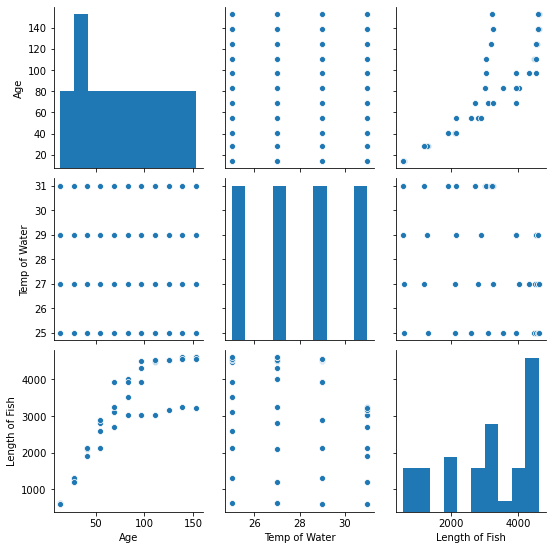

In [3]:
import seaborn 
seaborn.pairplot(dataset, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)

In [4]:
df_x = dataset.drop(['Length of Fish'],axis=1)
df_y = dataset['Length of Fish']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size = 0.25) 

print("Train data shape of X = % s and Y = % s : "%( 
	x_train.shape, y_train.shape)) 

print("Test data shape of X = % s and Y = % s : "%( 
	x_test.shape, y_test.shape)) 


Train data shape of X = (33, 2) and Y = (33,) : 
Test data shape of X = (11, 2) and Y = (11,) : 


In [6]:
# import Lasso regression from sklearn library 
from sklearn.linear_model import Lasso 

# Train the model 
#alpha is hyperparameter change according to data
lasso = Lasso(alpha = 3) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) #features with coefficients shrank to zero are features which are not important to model



Mean squared error on test set 343257.9214563442
         Columns  Coefficient Estimate
0            Age             27.442696
1  Temp of Water            -58.857364


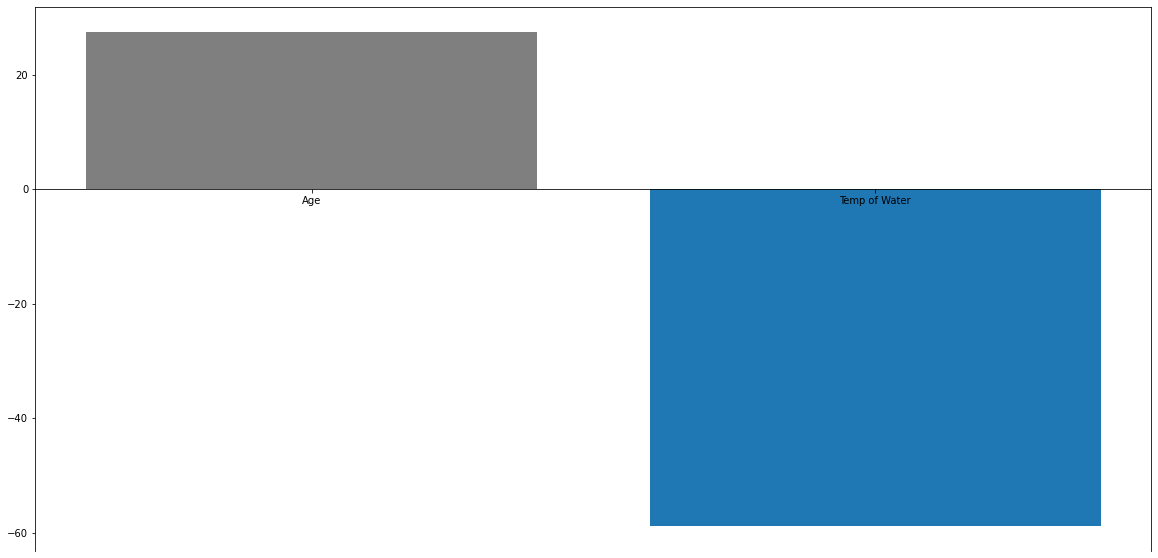

In [7]:
# plotting the coefficient score 
fig1, ax1 = plt.subplots(figsize =(20, 10)) 

color =['tab:gray', 'tab:blue', 'tab:orange', 
'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 

ax1.bar(lasso_coeff["Columns"], 
lasso_coeff['Coefficient Estimate'], 
color = color) 

ax1.spines['bottom'].set_position('zero') 

plt.style.use('ggplot') 
plt.show() 


In [8]:
selected_feat = x_train.columns
print('total features: {}'.format((x_train.shape[1])))   #total no. of features 
print('features with coefficients shrank to zero: {}'.format(
      np.sum(lasso.coef_ == 0)))     # no. of  features which are not important to model

total features: 2
features with coefficients shrank to zero: 0


In [9]:
removed_feats = x_train.columns[(lasso.coef_ == 0).ravel().tolist()]
removed_feats    #not important features 

Index([], dtype='object')